# Python-MLearning: Loan Data using Logistic Regression (LR) and Sklearn
## CLASSICAL LOGISTIC REGRESSION MODELING
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; September 10, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

# I IMPORT REQUIRED PACKAGES

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve 

#sklearn.linear_model.LogisticRegression
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# II FULL DATASET WITH MISSING VALUES FILLED

# 1 LOADING DATA

In [4]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\LogisticRegression\\Logistic3_Loan'

In [5]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Backup',
 'For REDUCED Dataset model development.txt',
 'Link to  Logistic stuff here.txt',
 'Links to LR3 GITHUBE and Nbviewer.txt',
 'LoanFree_LRModel.csv',
 'LoanFull.csv',
 'Loan_FullProcess.csv',
 'Loan_LRModel.csv',
 'Loan_Prediction',
 'Log_ROC.png',
 'Material Support',
 'PYTHON-MLearning_LR1_Introduction.ipynb',
 'PYTHON-MLearning_LR2_OPTIMAL-RFECV_Final.ipynb',
 'PYTHON-MLearning_LR3_Classical.ipynb',
 'PYTHON-MLearning_LR3_Exploratory_FEngineering_Final.ipynb',
 'PYTHON-MLearning_LR3_PCA.ipynb',
 'Summaries.xlsx',
 'To Put in the GitHube Menu.txt',
 'Visual']

In [6]:
# read csv (comma separated value) into data
df=pd.read_csv('Loan_LRModel.csv')
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'TotalIncome_log', 'LoanAmount_log', 'LoanIncome_log',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2'],
      dtype='object')

# 2 MODELING

In [7]:
cat_vars=['Gender', 'Dependents', 'Self_Employed']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [8]:
data_final=df[to_keep]
data_final.columns.values, data_final.dtypes, data_final.shape

(array(['Loan_ID', 'Married', 'Education', 'Loan_Amount_Term',
        'Credit_History', 'Loan_Status', 'TotalIncome_log',
        'LoanAmount_log', 'LoanIncome_log', 'Property_Area_0',
        'Property_Area_1', 'Property_Area_2'], dtype=object),
 Loan_ID              object
 Married               int64
 Education             int64
 Loan_Amount_Term    float64
 Credit_History      float64
 Loan_Status           int64
 TotalIncome_log     float64
 LoanAmount_log      float64
 LoanIncome_log      float64
 Property_Area_0       int64
 Property_Area_1       int64
 Property_Area_2       int64
 dtype: object,
 (981, 12))

In [9]:
y_data = data_final['Loan_Status']
vars =['Loan_Status','Loan_ID']
X_data = data_final.drop(vars, axis=1)                  
df.shape, y_data.shape, X_data.shape

((981, 15), (981,), (981, 10))

## Train and Validation Datasets

In [10]:
#Divide X_data and Y_data into train and test data
X_train, X_test, y_train,  y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=0,
                                                                     stratify= y_data, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((686, 10), (295, 10), (686,), (295,))

## BUILD MODEL

## Checking Global Model Significance

In [11]:
from __future__ import print_function
import statsmodels.api as sm
import pandas.tseries
from pandas.core import datetools
glm_binom = sm.GLM(y_data, X_data, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  981
Model:                            GLM   Df Residuals:                      972
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -343.95
Date:                Tue, 11 Sep 2018   Deviance:                       687.89
Time:                        11:26:13   Pearson chi2:                     980.
No. Iterations:                     6                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Married              0.5438      0.209      2.601      0.009       0.134       0.954
Education           -0.3265      0

The p_value for at least two of the predictor variables is less than 0.05. Therefore, assuming a classic risk of 5% we can accept that the model is a globally valid one. Anyway, we must take into account that most of the predictor variables appear to be not significantly important for the model.  It is left up to the readers to play around with the dataset. For instance, try keeping only "Married" and "Credit_History" as predictor variables and see what happened.

## What values for the model's hyperparameters would be selected?

In [13]:
# Import necessary modules
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

startTime = datetime.now()
# Setup the parameters and distributions to sample from: param_dist
param_grid = {'C': np.arange(1e-05, 3, 0.1),      
           "solver" : ['newton-cg', 'lbfgs']}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')
gs.fit(X_train, y_train)
#results = gs.cv_results_
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

C:\Users\Alvaro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Alvaro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Total running time (H: M: S. ThS) 0:01:11.467088 seconds.


In [14]:
print('='*20)
print("best estimator: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

best estimator: LogisticRegression(C=0.10001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.10001, 'solver': 'newton-cg'}
best score: 0.8688046647230321


## Using the best parameters to Fit, Evaluate, and Make predictions

### Fitting the Model

In [15]:
# train your model using X_train, y_train and the best known parameters
lr = LogisticRegression( C=0.10001, solver='newton-cg',  random_state=7)
lr.fit(X_train, y_train)

LogisticRegression(C=0.10001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=7,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

### Evaluating the Model

In [16]:
# Evaluating LR model
print('With LR train datasets () accuracy is: ',round(lr.score(X_train,y_train),4)) # accuracy 

With LR train datasets () accuracy is:  0.8688


In [51]:
predictions = lr.predict(X_test)
print('Accuracy based on X_test, y_test: ',accuracy_score(y_test, predictions))
print('')
print('Confusion Matrix:\n ',confusion_matrix(y_test, predictions))
print('With LR train datasets () accuracy is: ',round(lr.score(X_train,y_train),4)) # accuracy ',confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy based on X_test, y_test:  0.9084745762711864

Confusion Matrix:
  [[ 49  26]
 [  1 219]]
With LR train datasets () accuracy is:  0.8688
             precision    recall  f1-score   support

          0       0.98      0.65      0.78        75
          1       0.89      1.00      0.94       220

avg / total       0.92      0.91      0.90       295



Precision, recall and f1-score are metrics to measure the accuracy of classification models. A general explanation can be got in [Wikipedia](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers).

Based on LR testing datasets (X_test, y_test), looks like we misclassified 27 clients, leaving us with a 90.85% accuracy rate  (with 92% precision and 91% recall). Meantime, With LR train datasets (X_train, y_train) accuracy is  86.88%

#### Getting Model's Beta Coefficients

In [52]:
# print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

[-0.01395675]
[[ 3.80967583e-01 -3.35244402e-01  3.93230494e-05  2.31082180e+00
  -6.55207717e-02 -1.53577506e-01 -8.80567344e-02 -2.71452677e-01
   2.68213698e-01 -1.07177735e-02]]


In [56]:
feature_cols = data_final.columns.drop(['Loan_ID', 'Loan_Status'])
feature_cols

Index(['Married', 'Education', 'Loan_Amount_Term', 'Credit_History',
       'TotalIncome_log', 'LoanAmount_log', 'LoanIncome_log',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2'],
      dtype='object')

In [58]:
##pair the feature names with the coefficients
list(zip(feature_cols,  lr.coef_[0]))

[('Married', 0.3809675833834334),
 ('Education', -0.33524440215985984),
 ('Loan_Amount_Term', 3.9323049406732824e-05),
 ('Credit_History', 2.3108218019031335),
 ('TotalIncome_log', -0.06552077173336503),
 ('LoanAmount_log', -0.1535775061025848),
 ('LoanIncome_log', -0.08805673436918869),
 ('Property_Area_0', -0.27145267707762255),
 ('Property_Area_1', 0.26821369778495746),
 ('Property_Area_2', -0.010717773521012428)]

### Making Predictions

#### Based on the training dataset

The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set obtained from the partition over X_train (in our case).

In [28]:
predictions = cross_val_predict(lr, X_train, y_train, cv=10)
print('Prediction: {}', predictions)

Prediction: {} [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1

#### Based on the test dataset

Now we used the function predict which is regularly the one to be used to get the predictions on a new dataset.  In our case, the new dataset is the X_test one.

In [30]:
# train your model using all data.
startTime = datetime.now()
lr.fit(X_data, y_data) 
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:00:00.005001 seconds.


In [32]:
predictions = lr.predict(X_test)
print('Prediction: {}', predictions)

Prediction: {} [0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1]


# III REDUCED DATASET WITHOUT MISSING VALUES

# 1 LOADING DATA

In [12]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\LogisticRegression\\Logistic3_Loan'

In [13]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Backup',
 'For REDUCED Dataset model development.txt',
 'Link to  Logistic stuff here.txt',
 'Links to LR3 GITHUBE and Nbviewer.txt',
 'LoanFree_LRModel.csv',
 'LoanFull.csv',
 'Loan_FullProcess.csv',
 'Loan_LRModel.csv',
 'Loan_Prediction',
 'Log_ROC.png',
 'Material Support',
 'PYTHON-MLearning_LR1_Introduction.ipynb',
 'PYTHON-MLearning_LR2_OPTIMAL-RFECV_Final.ipynb',
 'PYTHON-MLearning_LR3_Classical.ipynb',
 'PYTHON-MLearning_LR3_Exploratory_FEngineering_Final.ipynb',
 'PYTHON-MLearning_LR3_PCA.ipynb',
 'Summaries.xlsx',
 'To Put in the GitHube Menu.txt',
 'Visual']

In [17]:
# read csv (comma separated value) into data
df=pd.read_csv('LoanFree_LRModel.csv')
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'TotalIncome_log', 'LoanAmount_log', 'LoanIncome_log',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2'],
      dtype='object')

# 2 MODELING

In [18]:
cat_vars=['Gender', 'Dependents', 'Self_Employed']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [19]:
data_final=df[to_keep]
data_final.columns.values, data_final.dtypes, data_final.shape

(array(['Loan_ID', 'Married', 'Education', 'Loan_Amount_Term',
        'Credit_History', 'Loan_Status', 'TotalIncome_log',
        'LoanAmount_log', 'LoanIncome_log', 'Property_Area_0',
        'Property_Area_1', 'Property_Area_2'], dtype=object),
 Loan_ID              object
 Married               int64
 Education             int64
 Loan_Amount_Term    float64
 Credit_History      float64
 Loan_Status           int64
 TotalIncome_log     float64
 LoanAmount_log      float64
 LoanIncome_log      float64
 Property_Area_0       int64
 Property_Area_1       int64
 Property_Area_2       int64
 dtype: object,
 (769, 12))

In [20]:
y_data = data_final['Loan_Status']
vars =['Loan_Status','Loan_ID']
X_data = data_final.drop(vars, axis=1)                  
df.shape, y_data.shape, X_data.shape

((769, 15), (769,), (769, 10))

## Train and Validation Datasets

In [21]:
#Divide X_data and Y_data into train and test data
X_train, X_test, y_train,  y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=0,
                                                                     stratify= y_data, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((538, 10), (231, 10), (538,), (231,))

## BUILD MODEL

## Checking Global Model Significance

In [22]:
from __future__ import print_function
import statsmodels.api as sm
import pandas.tseries
from pandas.core import datetools
glm_binom = sm.GLM(y_data, X_data, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  769
Model:                            GLM   Df Residuals:                      760
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -270.24
Date:                Tue, 11 Sep 2018   Deviance:                       540.47
Time:                        11:32:26   Pearson chi2:                     769.
No. Iterations:                     6                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Married              0.6527      0.236      2.761      0.006       0.189       1.116
Education           -0.2925      0

The p_value for at least two of the predictor variables is less than 0.05. Therefore, assuming a classic risk of 5% we can accept that the model is a globally valid one. Anyway, we must take into account that most of the predictor variables appear to be not significantly important for the model. It is left up to the readers to play around with the dataset. For instance, try keeping only "Married" and "Credit_History" as predictor variables and see what happened.

## What values for the model's hyperparameters would be selected?

In [23]:
# Import necessary modules
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

startTime = datetime.now()
# Setup the parameters and distributions to sample from: param_dist
param_grid = {'C': np.arange(1e-05, 3, 0.1),      
           "solver" : ['newton-cg', 'lbfgs']}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')
gs.fit(X_train, y_train)
#results = gs.cv_results_
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:01:01.830537 seconds.


In [24]:
print('='*20)
print("best estimator: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

best estimator: LogisticRegression(C=0.10001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.10001, 'solver': 'newton-cg'}
best score: 0.8773234200743495


## Using the best parameters to Fit and Evaluate the model

### Fitting the Model

In [25]:
# train your model using X_train, y_train and the best known parameters
lr = LogisticRegression( C=0.10001, solver='newton-cg',  random_state=7)
lr.fit(X_train, y_train)

LogisticRegression(C=0.10001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=7,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

## Evaluating the Model

In [26]:
# Evaluating LR model
print('With LR train datasets () accuracy is: ',round(lr.score(X_train,y_train),4)) # accuracy 

With LR train datasets () accuracy is:  0.8773


In [27]:
predictions = lr.predict(X_test)
print('Accuracy based on X_test, y_test: ',accuracy_score(y_test, predictions))
print('')
print('Confusion Matrix:\n ',confusion_matrix(y_test, predictions))
print('With LR train datasets () accuracy is: ',round(lr.score(X_train,y_train),4)) # accuracy ',confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy based on X_test, y_test:  0.8874458874458875

Confusion Matrix:
  [[ 34  24]
 [  2 171]]
With LR train datasets () accuracy is:  0.8773
             precision    recall  f1-score   support

          0       0.94      0.59      0.72        58
          1       0.88      0.99      0.93       173

avg / total       0.89      0.89      0.88       231



Precision, recall and f1-score are metrics to measure the accuracy of classification models. A general explanation can be got in [Wikipedia](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers).

Based on LR testing datasets (X_test, y_test), looks like we misclassified 26 clients, leaving us with a 88.75% accuracy rate (with 89% precision and 89% recall). Meantime, With LR train datasets (X_train, y_train) accuracy is 87.73%

### Getting Model's Beta Coefficients

In [29]:
# print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

[1.08274111]
[[ 3.33247143e-01 -1.81486436e-01  5.84528155e-04  2.17820264e+00
  -1.54367454e-01 -1.94573303e-01 -4.02058492e-02 -9.43557848e-02
   1.44524346e-01 -5.01685712e-02]]


In [30]:
feature_cols = data_final.columns.drop(['Loan_ID', 'Loan_Status'])
feature_cols

Index(['Married', 'Education', 'Loan_Amount_Term', 'Credit_History',
       'TotalIncome_log', 'LoanAmount_log', 'LoanIncome_log',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2'],
      dtype='object')

In [31]:
##pair the feature names with the coefficients
list(zip(feature_cols,  lr.coef_[0]))

[('Married', 0.33324714287164303),
 ('Education', -0.1814864362370339),
 ('Loan_Amount_Term', 0.0005845281548335384),
 ('Credit_History', 2.1782026378944233),
 ('TotalIncome_log', -0.15436745354371317),
 ('LoanAmount_log', -0.19457330276203122),
 ('LoanIncome_log', -0.04020584921831716),
 ('Property_Area_0', -0.09435578475843752),
 ('Property_Area_1', 0.14452434614281617),
 ('Property_Area_2', -0.05016857122337983)]

# IV ROC CURVES TWO MODELS IN THE SAME PLOT

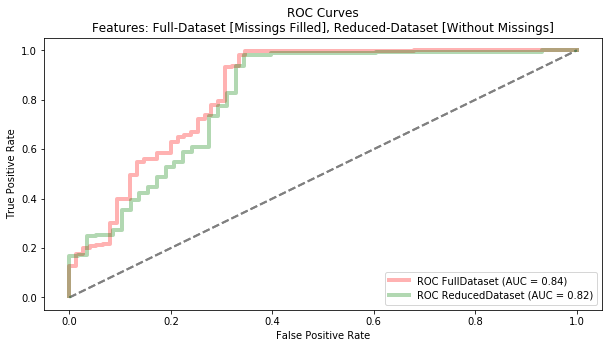

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score

plt.subplots(1, 1, figsize=(10, 5))

# Model1: FULL DATASET WITH MISSING VALUES FILLED

# read csv (comma separated value) into data
df=pd.read_csv('Loan_LRModel.csv')
df.columns


cat_vars=['Gender', 'Dependents', 'Self_Employed']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=df[to_keep]


y_data = data_final['Loan_Status']
vars =['Loan_Status','Loan_ID']
X_data = data_final.drop(vars, axis=1) 


#Divide X_data and y_data into train and test data
X_train, X_test, y_train,  y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=0,
                                                                                      stratify= y_data, shuffle=True)

lr = LogisticRegression( C=0.10001, solver='newton-cg',  random_state=7)
lr.fit(X_train, y_train)

y_pred_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot([0,1],[0,1],linestyle = '--',lw = 2, color = 'gray')
plt.plot(fpr, tpr, lw=4, alpha=0.3, label='ROC FullDataset (AUC = %0.2f)' % ( roc_auc), color = 'red')



#Model2: REDUCED DATASET WITHOUT MISSING VALUES

# read csv (comma separated value) into data
df=pd.read_csv('LoanFree_LRModel.csv')
df.columns


cat_vars=['Gender', 'Dependents', 'Self_Employed']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=df[to_keep]


y_data = data_final['Loan_Status']
vars =['Loan_Status','Loan_ID']
X_data = data_final.drop(vars, axis=1) 


#Divide X_data and y_data into train and test data
X_train, X_test, y_train,  y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=0,
                                                                                      stratify= y_data, shuffle=True)

lr = LogisticRegression(C=0.10001, solver='newton-cg',  random_state=7)
lr.fit(X_train, y_train)

y_pred_prob = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot([0,1],[0,1],linestyle = '--',lw = 2, color = 'gray')
plt.plot(fpr, tpr, lw=4, alpha=0.3, label='ROC ReducedDataset (AUC = %0.2f)' % ( roc_auc), color = 'green')



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves\nFeatures: Full-Dataset [Missings Filled], Reduced-Dataset [Without Missings]')
plt.legend(loc="lower right")
plt.show()


<hr>
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; September 10, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>